# ------------------------GDAL---------------------------

## 矢量数据

In [6]:
import numpy as np

In [8]:
#读取shp文件 获得要素数量
import os
from osgeo import ogr

daShapefile = r"fiona_test.shp"

driver = ogr.GetDriverByName('ESRI Shapefile')

dataSource = driver.Open(daShapefile, 0) # 0 means read-only. 1 means writeable.

# Check to see if shapefile is found.
if dataSource is None:
    print('Could not open %s'%(daShapefile))
else:
    print ('Opened %s' % (daShapefile))
    layer = dataSource.GetLayer()
    featureCount = layer.GetFeatureCount()
    print("Number of features in %s: %d" % (os.path.basename(daShapefile),featureCount))

Opened fiona_test.shp
Number of features in fiona_test.shp: 2


In [2]:
#获得数据库中所有图层
from osgeo import ogr

databaseServer = "192.168.65.1"
databaseName = "geohey"
databaseUser = "jingcb"
databasePW = "290504"


connString = "PG: host=%s dbname=%s user=%s password=%s" %(databaseServer,databaseName,databaseUser,databasePW)

conn = ogr.Open(connString)

layerList = []
for i in conn:
    daLayer = i.GetName()
    if not daLayer in layerList:
        layerList.append(daLayer)

layerList.sort()

for j in layerList:
    print(j)

# Close connection
conn = None

base.administration_township
bigdata
fangtest
fangtest_beijing_sub
fangtest_point
poi_dis
town
world_country_point
world_country_polygon


In [3]:
#获得 数据库图层的要素数量
import sys
def GetPGLayer( lyr_name ):
    conn = ogr.Open(connString)

    lyr = conn.GetLayer( lyr_name )
    if lyr is None:
        print >> sys.stderr, '[ ERROR ]: layer name = "%s" could not be found in database "%s"' % ( lyr_name, databaseName )
        sys.exit( 1 )

    featureCount = lyr.GetFeatureCount()
    print ("Number of features in %s: %d" % ( lyr_name , featureCount ))

    # Close connection
    conn = None

In [4]:
GetPGLayer('fangtest')

Number of features in fangtest: 2305


In [5]:
#获取要素的geometry
from osgeo import ogr
import os

shapefile = "fiona_test.shp"
driver = ogr.GetDriverByName("ESRI Shapefile")
dataSource = driver.Open(shapefile, 0)
layer = dataSource.GetLayer()

for feature in layer:
    geom = feature.GetGeometryRef()
    print(geom.Centroid().ExportToWkt())

POINT (-87.63 41.88)
POINT (-94.584 39.101)


In [7]:
#属性过滤
from osgeo import ogr
import os

shapefile = "fiona_test.shp"
driver = ogr.GetDriverByName("ESRI Shapefile")
dataSource = driver.Open(shapefile, 0)
layer = dataSource.GetLayer()

layer.SetAttributeFilter("name = 'Chicago'")

for feature in layer:
    print (feature.GetField("name"))

Chicago


In [8]:
#获取属性名
from osgeo import ogr

daShapefile = r"fiona_test.shp"

dataSource = ogr.Open(daShapefile)
daLayer = dataSource.GetLayer(0)
layerDefinition = daLayer.GetLayerDefn()


for i in range(layerDefinition.GetFieldCount()):
    print(layerDefinition.GetFieldDefn(i).GetName())

name


## 栅格影像

In [2]:
#打开数据，获取影像元数据
from osgeo import gdal
gtif = gdal.Open( "images/input.tif" )
print(gtif.GetMetadata())

{'AREA_OR_POINT': 'Point'}


In [6]:
# 获取波段信息
srcband = gtif.GetRasterBand(1)

In [10]:
# 统计信息
srcband.GetStatistics( True, True )   #最小像素值， 最大， 平均，标准偏差

[8896.0, 33262.0, 10320.252106409176, 882.4653425033526]

In [13]:
print("[ NO DATA VALUE ] = ", srcband.GetNoDataValue())
print( "[ SCALE ] = ", srcband.GetScale())
print( "[ UNIT TYPE ] = ", srcband.GetUnitType())

[ NO DATA VALUE ] =  0.0
[ SCALE ] =  1.0
[ UNIT TYPE ] =  


In [ ]:
#某一个波段的矢栅转换
from osgeo import gdal, ogr
import sys
# this allows GDAL to throw Python Exceptions
gdal.UseExceptions()

#
#  get raster datasource
#
src_ds = gdal.Open( "images/input.tif" )
if src_ds is None:
    print('Unable to open %s' % src_filename)
    sys.exit(1)

try:
    srcband = src_ds.GetRasterBand(1)
except RuntimeError as e:
    # for example, try GetRasterBand(10)
    print('Band ( %i ) not found' % 1)
    print (e)
    sys.exit(1)

#
#  create output datasource
#
dst_layername = "POLYGONIZED_STUFF"
drv = ogr.GetDriverByName("ESRI Shapefile")
dst_ds = drv.CreateDataSource( dst_layername + ".shp" )
dst_layer = dst_ds.CreateLayer(dst_layername, srs = None )

gdal.Polygonize( srcband, None, dst_layer, -1, [], callback=None )

# -------------------------rasterio----------------------------

In [1]:
import rasterio

In [2]:
#读取tiff文件
dataset = rasterio.open('images/input.tif')

In [5]:
dataset.name

'images/input.tif'

In [6]:
dataset.mode

'r'

In [7]:
dataset.closed

False

In [8]:
dataset.count

1

In [9]:
dataset.width

7751

In [10]:
dataset.height

7881

In [11]:
dataset.bounds

BoundingBox(left=358185.0, bottom=4346085.0, right=590715.0, top=4582515.0)

In [8]:
#仿射变换矩阵
dataset.transform

Affine(30.0, 0.0, 358185.0,
       0.0, -30.0, 4582515.0)

In [9]:
#利用变换矩阵求取某一像素点的地理坐标
dataset.transform *(0,0)

(358185.0, 4582515.0)

In [14]:
dataset.transform *(dataset.width,dataset.height)

(590715.0, 4346085.0)

In [15]:
dataset.xy(0,0)

(358200.0, 4582500.0)

In [69]:
#坐标系
dataset.crs

CRS({'init': 'epsg:32650'})

In [70]:
#波段
dataset.read(1)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

##### read()方法返回的是numpy数组

In [76]:
#行列号索引
dataset.read(1)[dataset.height // 2, dataset.width // 2]

10716

In [75]:
#空间索引
x, y = (dataset.bounds.left + 100000, dataset.bounds.top - 50000)
row, col = dataset.index(x, y)
row, col

(1666, 3333)

#### 生成每个波段的统计

In [2]:

import rasterio
import numpy as np

path = "images/RGB.byte.tif"
with rasterio.open(path) as src:
    array = src.read()

stats = []
for band in array:
    stats.append({
        'min': band.min(),
        'mean': band.mean(),
        'median': np.median(band),
        'max': band.max()})

print(stats)

[{'mean': 29.94772668847656, 'max': 255, 'median': 13.0, 'min': 0}, {'mean': 44.516147889382289, 'max': 255, 'median': 30.0, 'min': 0}, {'mean': 48.113056354742945, 'max': 255, 'median': 30.0, 'min': 0}]


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

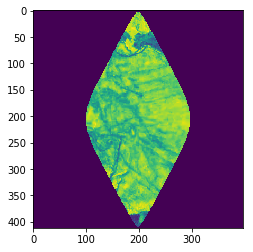

In [9]:
import numpy as np
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio import crs

rgb = 'images/world.rgb.tif'
out = 'images/reproj.tif'

# Reproject to NAD83(HARN) / Hawaii zone 3 (ftUS) - Transverse Mercator
dst_crs = crs.CRS = "EPSG:3759"


with rasterio.drivers(CHECK_WITH_INVERT_PROJ=True):
    with rasterio.open(rgb) as src:
        profile = src.profile
        # Calculate the ideal dimensions and transformation in the new crs
        dst_affine, dst_width, dst_height = calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds)

        # update the relevant parts of the profile
        profile.update({
            'crs': dst_crs,
            'transform': dst_affine,
            'affine': dst_affine,
            'width': dst_width,
            'height': dst_height
        })

        # Reproject and write each band
        with rasterio.open(out, 'w', **profile) as dst:
            for i in range(1, src.count + 1):
                src_array = src.read(i)
                dst_array = np.empty((dst_height, dst_width), dtype='uint8')
                
                reproject(
                    # Source parameters
                    source=src_array,
                    src_crs=src.crs,
                    src_transform=src.affine,
                    # Destination paramaters
                    destination=dst_array,
                    dst_transform=dst_affine,
                    dst_crs=dst_crs,
                    # Configuration
                    resampling=Resampling.nearest,
                    num_threads=2)
                plt.imshow(dst_array)
                #dst.write(dst_array, i)

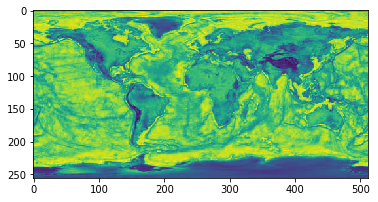

In [13]:
plt.imshow(src_array)

# --------------------遥感影像的基本处理------------------------

## --影像金字塔的建立

#### 使用gdaladdo

In [18]:
# 命令行 gdaladdo -r average -ro 'images/input.tif'.tif 2 4 8 16

#### 使用rasterio

In [17]:
from rasterio.vrt import WarpedVRT
from rasterio.enums import Resampling

In [ ]:
with rasterio.open('images/input.tif') as src:    
    with WarpedVRT(src,dst_crs='EPSG:3857',resampling=Resampling.bilinear) as vrt:
        result = vrt.read(window=window,boundless=True,resampling=Resampling.nearest,out_shape=out_shape,indexes=indexes)

## 合并

#### gdal_merge.py

In [19]:
# 命令行 gdal_merge.py -o merged.tif  input_files

## 栅格计算

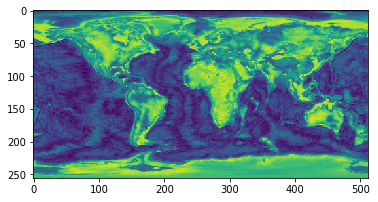

In [33]:
# 直方图拉伸
with rasterio.open('images/world.rgb.tif') as src:
    in_range = np.percentile(src.read(1)[src.read(1) > 0], (70, 98)).astype(np.int).tolist() 
    plt.imshow(src.read(1))
    imin, imax = in_range
    omin, omax = [1,255]
    image = np.clip(src.read(1), imin, imax) - imin
    image = image / np.float(imax - imin)
    out_array = image * (omax - omin) + omin
    

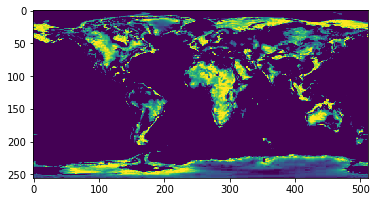

In [34]:
plt.imshow(out_array)

## 色彩变换

In [ ]:
#命令行 rio color -d uint8 -j 4 images/RGB.byte.tif images/RGB_GAMMA.tif \  gamma 3 0.95, sigmoidal 123 1 0.13

## 裁剪

In [36]:
import fiona
import rasterio
from rasterio.mask import mask

In [ ]:
with fiona.open("data/box.shp", "r") as shapefile:
    geoms = [feature["geometry"] for feature in shapefile]

with rasterio.open("images/RGB.byte.tif") as src:
    out_image, out_transform = mask(src, geoms, crop=True)
    out_meta = src.meta.copy()

out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open("images/masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)